In [ ]:
from data_provider.glassnode import GlassNodeKey, GlassNodeProvider
from data_provider.glassnode_enums import MarketGN, IndicatorsGN
from enums import Asset
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, date
import pandas as pd
import numpy as np

In [2]:
btc_mvrv_key = GlassNodeKey(MarketGN.mvrv_ratio, Asset.BTC, frequency='24h', currency='USD')
glassnode_pvd = GlassNodeProvider()
start_date = date(2010, 7, 17)
end_date = date.today()

In [3]:
btc_mvrv = glassnode_pvd.get(btc_mvrv_key)
btc_price_key = GlassNodeKey(MarketGN.price, Asset.BTC, frequency='24h', currency='USD')
btc_price_usd = glassnode_pvd.get(btc_price_key)

In [4]:
btc_realized_price_key = GlassNodeKey(MarketGN.price_realized_usd, Asset.BTC, frequency='24h', currency='USD')
btc_realized_price = glassnode_pvd.get(btc_realized_price_key)

In [5]:
btc_liveliness_key = GlassNodeKey(IndicatorsGN.liveliness, Asset.BTC, frequency='24h', currency='USD')
btc_liveliness = glassnode_pvd.get(btc_liveliness_key)

In [6]:
btc_rhodl_ratio_key = GlassNodeKey(IndicatorsGN.rhodl_ratio, Asset.BTC, frequency='24h', currency='USD')
btc_rhodl_ratio = glassnode_pvd.get(btc_rhodl_ratio_key)

In [7]:
btc_reserve_risk_key = GlassNodeKey(IndicatorsGN.reserve_risk, Asset.BTC, frequency='24h', currency='USD')
btc_reserve_risk = glassnode_pvd.get(btc_reserve_risk_key)

In [8]:
#Buy Dip (70% chance of bounce) = $35.2k
#Buy (80% chance of bounce) = $31.6k
#Strong buy (90% chance of bounce) = $24.3k

In [9]:
data_df = btc_price_usd.merge(btc_mvrv, how='outer', left_index=True, right_index=True).dropna()
data_df = data_df.merge(btc_realized_price, how='outer', left_index=True, right_index=True).dropna()
data_df = data_df.merge(btc_liveliness, how='outer', left_index=True, right_index=True).dropna()

In [10]:
data_df['rv_to_liveliness'] = data_df['market_price_realized_usd'] / data_df['indicators_liveliness']

In [11]:
data_df

,market_price_usd_close,market_mvrv,market_price_realized_usd,indicators_liveliness,rv_to_liveliness
t,,,,,
2010-07-17,0.049510,1.000000,0.049510,0.071162,0.695739
2010-07-18,0.085840,1.300600,0.049636,0.073075,0.679249
2010-07-19,0.080800,1.814750,0.050030,0.074044,0.675675
2010-07-20,0.074733,1.586253,0.050163,0.074156,0.676455
2010-07-21,0.079210,1.399411,0.050260,0.074776,0.672141
...,...,...,...,...,...
2022-01-12,43935.643985,1.774648,24336.840037,0.615707,39526.635026
2022-01-13,42596.123376,1.785894,24327.651297,0.615607,39518.140492
2022-01-14,43101.335996,1.758568,24322.679922,0.615463,39519.331579


In [15]:
# rv to liveliness ratio is mid price

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=data_df.index, y=data_df['market_price_usd_close'], name="price"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data_df.index, y=data_df['rv_to_liveliness'], name="rv_to_liveliness"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data_df.index, y=data_df['market_price_realized_usd'], name="market_price_realized_usd"),
    secondary_y=False,
)


# Add figure title
fig.update_layout(
    title_text="rv_to_liveliness vs Price"
)

# Set x-axis title
fig.update_xaxes(title_text="date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>rv_to_liveliness</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>price</b>", secondary_y=True)

fig.show()

In [ ]:
# rv_to_liveliness as midprice

In [18]:
btc_deviate_from_rvlive = np.log10(data_df['market_price_usd_close']) - np.log10(data_df['rv_to_liveliness'])

<AxesSubplot:xlabel='t'>

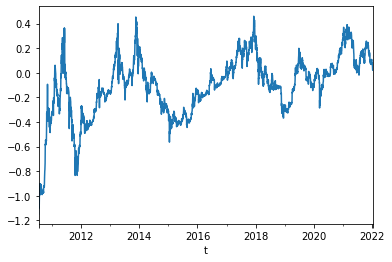

In [25]:
btc_deviate_from_rvlive.plot()

In [32]:
btc_deviate_from_rvlive.loc[date(2017,1,1):].std()

0.15871484103958816

In [41]:
btc_deviate_from_rvlive.loc[date(2017,1,1):].max()

0.45949895027386756

In [50]:
btc_deviate_from_rvlive.loc[date(2017,1,1):].mean()

0.040534499989144976

In [52]:
btc_deviate_from_rvlive.loc[date(2017,1,1):].median()

0.037240497269229955

In [56]:
0.037240497269229955 - 2*0.15871484103958816

-0.28018918480994637

In [57]:
btc_deviate_from_rvlive[btc_deviate_from_rvlive<-0.28]

t
2010-07-17   -1.147753
2010-07-18   -0.898339
2010-07-19   -0.922326
2010-07-20   -0.956724
2010-07-21   -0.928680
                ...   
2019-02-14   -0.298913
2019-02-15   -0.297990
2019-02-16   -0.296778
2019-02-17   -0.291248
2020-03-12   -0.286415
Length: 938, dtype: float64

In [23]:
fig = px.histogram(btc_deviate_from_rvlive)
fig.show()

In [14]:
data_df.head()

,market_price_usd_close,market_mvrv,market_price_realized_usd,indicators_liveliness,rv_to_liveliness
t,,,,,
2010-07-17,0.049510,1.000000,0.049510,0.071162,0.695739
2010-07-18,0.085840,1.300600,0.049636,0.073075,0.679249
2010-07-19,0.080800,1.814750,0.050030,0.074044,0.675675
2010-07-20,0.074733,1.586253,0.050163,0.074156,0.676455
2010-07-21,0.079210,1.399411,0.050260,0.074776,0.672141


In [13]:

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=data_df.index, y=np.log(data_df['market_price_usd_close']), name="price"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data_df.index, y=data_df['market_mvrv'], name="mvrv ratio"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="MVRV vs Price"
)

# Set x-axis title
fig.update_xaxes(title_text="date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>mvrv</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>price</b>", secondary_y=True)

fig.show()

In [ ]:
#funding rate ~1 while OI ath. likely a lot of shorts build up